In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [114]:
file_name = "/Users/maxkucher/preprocessing/mlops/loan_approval/loan_data.csv"
data = pd.read_csv(file_name)
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [115]:
print(data.columns)


Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


In [116]:
def uniques(name):
    return data[name].unique()


uniques("person_gender")

array(['female', 'male'], dtype=object)

In [117]:
def null_check(name):
    return data[name].isnull().sum()

null_check("person_gender")

0

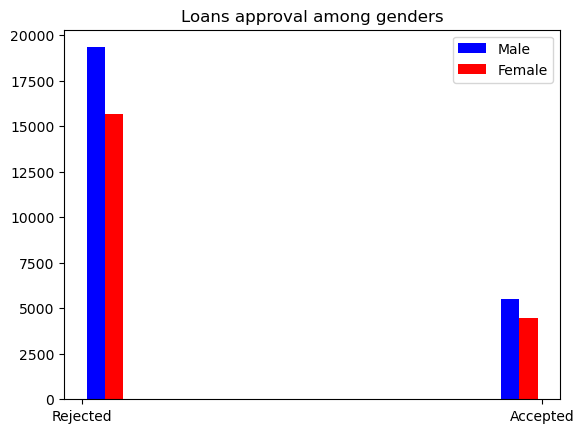

In [118]:
males = data[data["person_gender"] == "male"]["loan_status"]
females = data[data["person_gender"] == "female"]["loan_status"]

plt.title("Loans approval among genders")
plt.hist([males, females], color=["blue", "red"], label=["Male", "Female"])
plt.xticks([0, 1], ["Rejected", "Accepted"])
plt.legend()

In [119]:
uniques("person_education"), null_check("person_education")

(array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
       dtype=object),
 0)

In [120]:
uniques("person_home_ownership"), null_check("person_home_ownership")

(array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object), 0)

In [121]:
uniques("loan_intent"), null_check("loan_intent")

(array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
        'DEBTCONSOLIDATION'], dtype=object),
 0)

In [122]:
uniques("previous_loan_defaults_on_file"), null_check("previous_loan_defaults_on_file")

(array(['No', 'Yes'], dtype=object), 0)

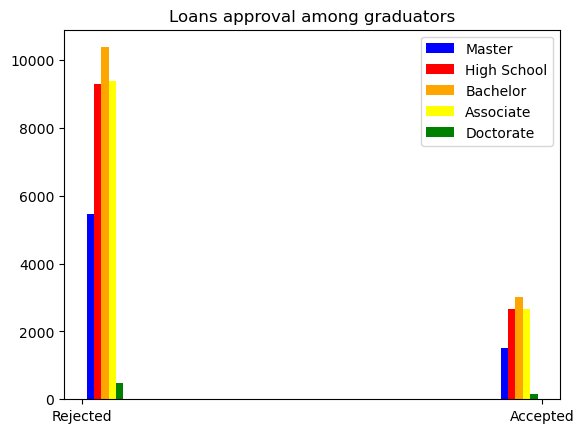

In [123]:
masters = data[data["person_education"] == "Master"]["loan_status"]
hijh_schoolers = data[data["person_education"] == "High School"]["loan_status"]
bachelors = data[data["person_education"] == "Bachelor"]["loan_status"]
associates = data[data["person_education"] == "Associate"]["loan_status"]
doctors = data[data["person_education"] == "Doctorate"]["loan_status"]

plt.title("Loans approval among graduators")
plt.hist([masters, hijh_schoolers, bachelors, associates, doctors], color=["blue", "red", "orange", "yellow", "green"], label=["Master", "High School", "Bachelor", "Associate", "Doctorate"])
plt.xticks([0, 1], ["Rejected", "Accepted"])
plt.legend()

In [124]:
uniques("loan_intent")

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

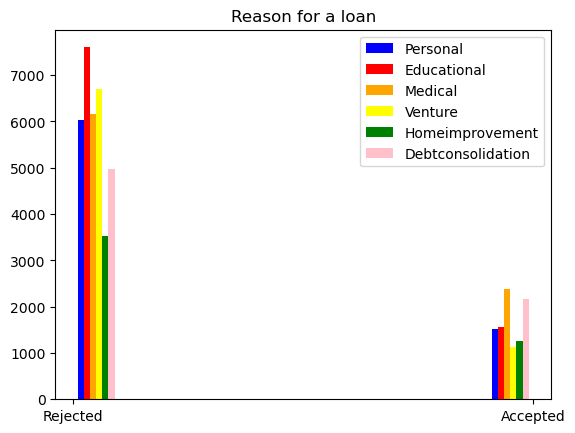

In [125]:
personals = data[data["loan_intent"] == "PERSONAL"]["loan_status"]
educational = data[data["loan_intent"] == "EDUCATION"]["loan_status"]
medicals = data[data["loan_intent"] == "MEDICAL"]["loan_status"]
ventures = data[data["loan_intent"] == "VENTURE"]["loan_status"]
homes = data[data["loan_intent"] == "HOMEIMPROVEMENT"]["loan_status"]
debts = data[data["loan_intent"] == "DEBTCONSOLIDATION"]["loan_status"]

plt.title("Reason for a loan")
plt.hist([personals, educational, medicals, ventures, homes, debts], color=["blue", "red", "orange", "yellow", "green", "pink"], label=["Personal", "Educational", "Medical", "Venture", "Homeimprovement", "Debtconsolidation"])
plt.xticks([0, 1], ["Rejected", "Accepted"])
plt.legend()

In [126]:
data["person_income"].isnull().sum()

0

In [127]:
median = data["person_income"].median()
median

67048.0

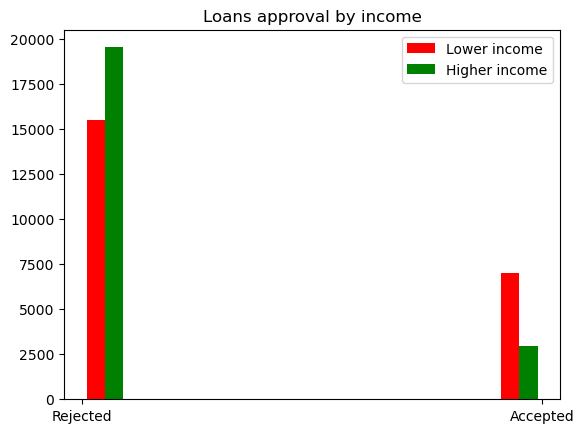

In [128]:
lower = data[data["person_income"] <= median]["loan_status"]
upper = data[data["person_income"] > median]["loan_status"]
plt.title("Loans approval by income")
plt.hist([lower, upper], color=["red", "green"], label=["Lower income", "Higher income"])
plt.xticks([0, 1], ["Rejected", "Accepted"])
plt.legend()

In [129]:
warnings.filterwarnings("ignore")

In [130]:
data.replace({"person_gender": {"female": 0, "male": 1}}, inplace=True)
data.replace({"previous_loan_defaults_on_file": {"No": 0, "Yes": 1}}, inplace=True)


In [131]:
data = pd.get_dummies(data, columns=["person_home_ownership", "loan_intent", "person_education"])